### Librerías que se utilizan:

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pyvista as pv
import meshio
import matplotlib.pyplot as plt
from scipy.integrate import quad

<center>
<h1>EJERICIO 1.</h1>
</center>

Utilizando el metodo de proyeccion de Galerkin encuentre los coeficientes que permiten aproximar la función en cada caso. Se sabe que una función aproximada se escrie de la siguiente manera 

$$ f(x) \approx \sum_{i=0}^{n} \alpha_i u_i(x) $$

Se tiene como problema encontrar los coeficientes $\alpha_i$ con los cuales se obtenga un error muy bajo entre la función real y la función aproximada.

Para darle solución a este problema, se define una siguiente función en la que se hace la aproximación nuemérica, en esta se incluye una matriz $A$ que contiene las funciones base que sirven para aproximar la función original; esta también contiene un vector $x$ en donde están los coeficientes $\alpha_i$, y por útltimo se tiene el vector $b$ del producto de la función a aproximar con la funcón base. Es decir, se tiene el siguiente sistema: 


$$A = [a_{ij}] = \mathbf{u}_i(x)\cdot \mathbf{u}_j(x) = \int \limits _\Omega u_i(x) u_j(x) dx $$

$$b = [b_i] = f(x) \cdot \mathbf{u}_i(x)  = \int \limits _\Omega f(x) u_i(x)dx$$

$$x = \alpha_i $$

De lo anterior, el problema toma la siguiente solución:  $$ x = A^{-1}b $$

In [2]:
def aproximacion_num(f, ui, lim):
    n = len(ui)                                                                 # Numero de iteraciones (cantidad de funciones base) 
    x = sym.Symbol('x')                                                         # Simbolo de la variable independiente 
    A = sym.zeros(n,n)                                                          # Matriz de la longitud de la cantidad de polinomios
    b = sym.zeros(n,1)                                                          # Vector de la funcion por el polinomio

    for i in range(n):
        for j in range(i, n): 

            funcion = sym.lambdify(x, ui[i]*ui[j])                              # Se toma valores numerico para "x" y con ellos se evalua ui[i]*ui[j]

            A[i,j] = quad(funcion, lim[0], lim[1])[0]                           # Integra la funcion de lambda en los limites establecidos y lo asocia a las posiciones i j de la matriz
            A[j,i] = A[i,j]

        funcion = sym.lambdify(x, ui[i]*f)

        b[i,0] = quad(funcion, lim[0], lim[1])[0]                               # Integra la funcion de lambda en los limites establecidos y toma solo el valor asociado a i

    alp = A.LUsolve(b)                                                          # Se resuelve el sistema para encontrar los coeficientes

    fg= 0                                                                       # Se inicia la función aproximada en cero 

    for i in range(n):
        fg += alp[i,0]*ui[i]                                                    # Se va agregando en cada iteracion

    funcion = sym.lambdify(x, (f-fg)*(f-fg))
    e  = np.sqrt(quad(funcion, lim[0], lim[1])[0])                              # Magnitud del error

    print(f"La magnitud del error entre la funcion real y la aproximada es de:\n {e}")

    return A, b, fg, alp

    

$a.$ Aproximar $tan(x)$ sobre el conjunto {1, $e^{−x}$, $e^{−2x}$, $e^{x}$, $e^{2x}$}, en el intervalo [0, π/4]

La magnitud del error entre la funcion real y la aproximada es de:
 0.00011111664875482143

La funcion aproximada es: 
 0.296475608312038*exp(2*x) - 0.731803087250492*exp(x) + 2.00072056418756 - 2.0036617319948*exp(-x) + 0.438611370407534*exp(-2*x)



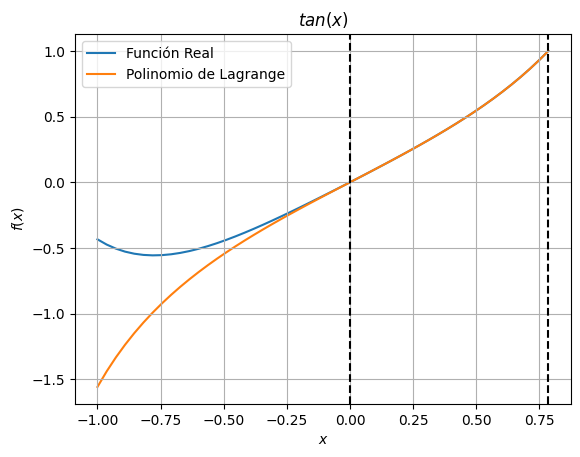

In [3]:
x = sym.Symbol('x')                                                                     # Variable independiente de forma simbolica
f = sym.tan(x)                                                                          # Funcion a aproximar
ui = [1, sym.exp(-x), sym.exp(-2*x), sym.exp(x), sym.exp(2*x)]                          # Funciones base de aproximacion
lim = [0, (np.pi)/4]                                                                    # Rango en el que se hace la integracion

A, b, fg, alp = aproximacion_num(f, ui, lim)

fg                                                                                      # Funcion aproximada 
print(f"\nLa funcion aproximada es: \n {fg}\n")

# GRAFICO  
xp = np.linspace(-1, (np.pi)/4)
fp = sym.lambdify(x,fg)(xp)
fr = sym.lambdify(x,f)(xp)

fig, ax1 = plt.subplots()

ax1.plot(xp,fp, zorder=0, label="Función Real")
ax1.plot(xp,fr, zorder=1, label="Polinomio de Lagrange")
ax1.set_title("$tan(x)$")
ax1.axvline(0, color='k', linestyle='--')
ax1.axvline((np.pi)/4, color='k', linestyle='--')
ax1.grid()
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
ax1.legend()

El área encerrada por las lineas punteadas corresponde al áreal entre los limites solicitados y de mejor aproximación

$b.$ Aproximar $f(x) = \frac{d^2}{dx^2}(e^{-x^2})$, sobre el conjunto {$sin(iπx)$, $cos(iπx)$}, con $i$ ∈ ${1, 2, 3}$, en el intervalo $[−5, 5]$

La magnitud del error entre la funcion real y la aproximada es de:
 1.8220231109328386

La funcion aproximada es: 
 -0.296705771889363*cos(3.14159265358979*x) - 0.00072385230661013*cos(6.28318530717959*x) - 7.11477485870297e-9*cos(9.42477796076938*x) - 2.11642378651709e-11*cos(12.5663706143592*x) + 1.55992771366842e-11*cos(15.707963267949*x) - 1.17961571484188e-11*cos(18.8495559215388*x) + 9.1516028101709e-12*cos(21.9911485751286*x) - 7.27536839878683e-12*cos(25.1327412287183*x)



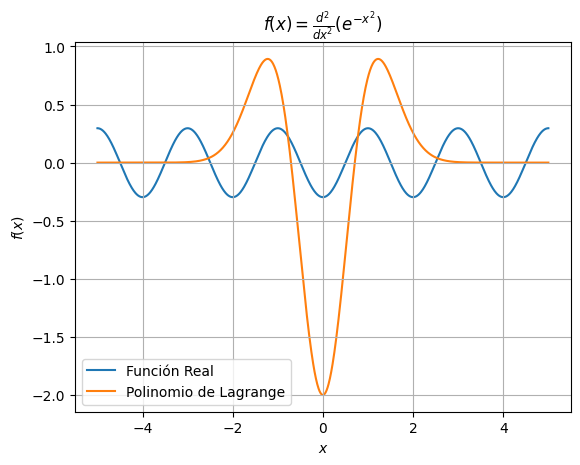

In [4]:
x = sym.Symbol('x')                                                                     # Variable independiente de forma simbolic                                     
derivada_2 = sym.exp(-x**2).diff(x,x)                                                   # Funcion a aproximar
ui = []                                                                                 # Funciones base de aproximacion
lim = [-5,5]                                                                            # Rango en el que se hace la integracion

ni = 8

for i in range(1, ni+1):
    ui.append(sym.sin(i*np.pi*x))
    ui.append(sym.cos(i*np.pi*x)) 

A, b, fg, alp = aproximacion_num(derivada_2,ui, lim)

fg                                                                                      # Funcion aproximada 
print(f"\nLa funcion aproximada es: \n {fg}\n")

# GRAFICO DE LAS FUNCIONES
xp = np.linspace(-5,5,1000)
fp = sym.lambdify(x,fg)(xp)
fr = sym.lambdify(x, derivada_2)(xp)

fig, ax1 = plt.subplots()

ax1.plot(xp,fp, zorder=0, label="Función Real")
ax1.plot(xp,fr, zorder=1, label="Polinomio de Lagrange")
ax1.set_title(r"$f(x) = \frac{d^2}{dx^2}(e^{-x^2})$")
ax1.grid()
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
ax1.legend()


$c.$ f(x) = $e^{−x^{2}}$+ $0.5 e^{−10(x−2.5)^{2}}$, sobre el conjunto {$1, x, x^{2}, x^{3}, x^{4}, x^{5}$}, en el intervalo [−2, 4]

La magnitud del error entre la funcion real y la aproximada es de:
 0.35395011099056606

La funcion aproximada es: 
 -0.0118957196778012*x**5 + 0.0535719952843212*x**4 + 0.0630927148339173*x**3 - 0.412976319014695*x**2 - 0.0350468286446076*x + 0.844037636831369



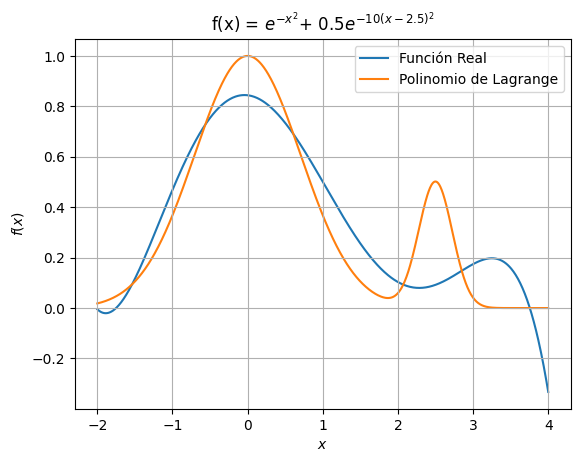

In [5]:
x = sym.Symbol('x')                                                                 # Variable independiente de forma simbolica
f = sym.exp(-x**2) + 0.5 * sym.exp(-10*(x-2.5)**2)                                  # Funcion a aproximar
ui = [1, x, x**2, x**3, x**4, x**5]                                                 # Funciones base de aproximacion
lim = [-2, 4]                                                                       # Rango en el que se hace la integracion

A, b, fg, alp = aproximacion_num(f, ui, lim)

fg                                                                                  # Funcion aproximada 
print(f"\nLa funcion aproximada es: \n {fg}\n")

# GRAFICO DE LAS FUNCIONES
xp = np.linspace(-2, 4,1000)
fp = sym.lambdify(x,fg)(xp)
fr = sym.lambdify(x, f)(xp)

fig, ax1 = plt.subplots()

ax1.plot(xp,fp, zorder=0, label="Función Real")
ax1.plot(xp,fr, zorder=1, label="Polinomio de Lagrange")
ax1.set_title(r"f(x) = $e^{−x^{2}}$+ $0.5 e^{−10(x−2.5)^{2}}$")
ax1.grid()
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
ax1.legend()

<center>
<h1>EJERICIO 2.</h1>
</center>


Utilice el metodo de interpolación de Lagrange para encontrar un polinomio que se ajuste a la funcion. Para esto se concidera la expresión para la interpolación de lagrange:
 
$$ f(x) = y_j(x_i) = \sum_{j=0}^{n} \alpha_j u_j(x_i) $$

Con este método de busca el polinmio de orden $n$ que pase por un conjunto de $n+1$ puntos, considerando que 

$$y_j(x_i) = \begin{cases}1, & \text{si } i = j \\0, & \text{si } i \neq j\end{cases}$$

In [6]:
def lagrange(xi, yi):
    n  = len(xi)                                                # Numero de iteraciones
    x  = sym.Symbol('x')
    ui = sym.ones(n, 1)                                         # Arreglo de polinomios 
    b = sym.zeros(n, 1)                                         # Funcion a aproximar
    
    for i in range(n):
        b[i] = yi[i]
        for j in range(n):
            if i!=j:
                ui[i] *= (x-xi[j])/(xi[i] - xi[j])              # Cuando i es diferente de j debe dar cero 
    
    polinomio = 0
    for i in range(n):
        polinomio += b[i]*ui[i,0]   
        
    return ui, polinomio

La funcion aproximada es: 
 0.5*x*(0.25 - 0.75*x)*(0.4 - 0.6*x)*(0.5 - 0.5*x)*(-3.0*x - 2.0)*(-1.5*x - 0.5) - 0.625000000000003*x*(0.333333333333333 - 1.0*x)*(0.5 - 0.75*x)*(0.6 - 0.6*x)*(-3.0*x - 1.0)*(3.0*x + 3.0) - 1.75*x*(0.5 - 1.5*x)*(0.666666666666667 - 1.0*x)*(0.75 - 0.75*x)*(1.5*x + 1.5)*(3.0*x + 2.0) + 2.75*x*(1.5 - 1.5*x)*(2.0 - 3.0*x)*(0.75*x + 0.75)*(1.0*x + 0.666666666666667)*(1.5*x + 0.5) + 1.625*x*(3.0 - 3.0*x)*(0.6*x + 0.6)*(0.75*x + 0.5)*(1.0*x + 0.333333333333333)*(3.0*x - 1.0) + 0.5*x*(0.5*x + 0.5)*(0.6*x + 0.4)*(0.75*x + 0.25)*(1.5*x - 0.5)*(3.0*x - 2.0)


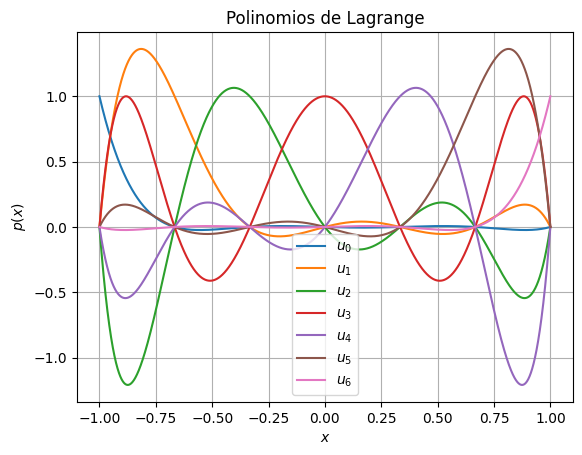

In [7]:
x = sym.Symbol('x')    
n = 7                                                           # Polinomio de orden n requiere n+1 puntos (poli 5 pun 6)
funcion = ((sym.sin(np.pi*x))**2)+(x/2)                         # Funcion a aproximar
lim = [-1,1]

Xi = np.linspace(lim[0],lim[1], n)                              # Intervalo de interpolacion dividido en n+1 puntos (6)
Fi = sym.lambdify(x, funcion)(Xi)

ui, fl = lagrange(Xi, Fi)

print(f"La funcion aproximada es: \n {fl}")                         #Polinomio lagrange

# GRAFICA DE POLINOMIOS INTERPOLANTES
x2  = np.linspace(lim[0],lim[1], 10000)
y2 = sym.lambdify(x, funcion)(x2) 
plt.figure()
for i,u in enumerate(ui):
    px = sym.lambdify(x, u)(x2)
    plt.plot(x2,px, label=f"$u_{i}$")
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.title(f"Polinomios de Lagrange")
plt.legend()

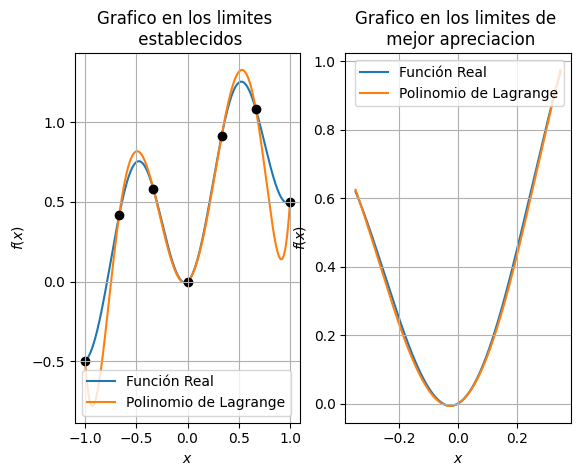

In [8]:
yl= sym.lambdify(x, fl)(x2)                                             # Polinomio de lagrange evaluada en el mismo rango de la funcion original

xb = np.linspace(-0.35, 0.35, 10000)                                    # Limites en los que se ve una mejor aproximacion
y2b = sym.lambdify(x, funcion)(xb)                                      # Funcion real evualauda en los nuevos limites
ylb= sym.lambdify(x, fl)(xb)                                            # Polinomio de lagrange evaluada en los nuevos limites


# GRAFICO 
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(x2,y2, zorder=0, label="Función Real")
ax1.plot(x2,yl, zorder=1, label="Polinomio de Lagrange")
ax1.set_title("Grafico en los limites \n establecidos")

ax1.scatter(Xi, Fi, c='k')
ax1.grid()
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
ax1.legend()

#-------------------------------------------------------------------

ax2.plot(xb,y2b, zorder=0, label="Función Real")
ax2.plot(xb,ylb, zorder=1, label="Polinomio de Lagrange")
ax2.set_title("Grafico en los limites de \n mejor apreciacion")

ax2.grid()
ax2.set_xlabel("$x$")
ax2.set_ylabel("$f(x)$")
ax2.legend()

# 3. Integración 1D
#### Integral:
$$\int \limits_{0}^{8}\left(sin^2(\pi x) + cos(x)\right)dx$$

Funciones para la integración numérica con el método de Cuadratura Gaussiana: 

In [9]:
def numerical_integration_1D(xa, xb, f, n):
    points, wi = np.polynomial.legendre.leggauss(n)
    
    m = (xb-xa)/2
    xi = m*points + m+xa

    yi = sym.lambdify(x, f)(xi)
    area = (xb-xa)*sum(wi*yi)/2
    return area

def segmented_1D_numerical_integration(la, lb, n, f):
    xn = np.linspace(la, lb, n+1)

    integral = 0
    for j in range(n):
        xa = xn[j]
        xb = xn[j+1]

        area = numerical_integration_1D(xa, xb, f, 2)
        integral += area
    return integral

Solución analítica:

In [10]:
x = sym.Symbol('x')
f = (sym.sin(sym.pi*x))**2 + sym.cos(x)

la, lb = (0, 8)

analyticalIntegral = round(sym.integrate(f, (x, la, lb)),5)
print('Integral real: ', round(analyticalIntegral,5))

Integral real:  4.98936


Integración para el dominio subdividido n segmentos y en cada uno de ellos se utiliza 2 puntos de
cuadratura y luego se suma el resultado; Integración en todo el dominio utilizando n puntos de cuadratura; Y comparacion del el error relativo de los dos métodos.

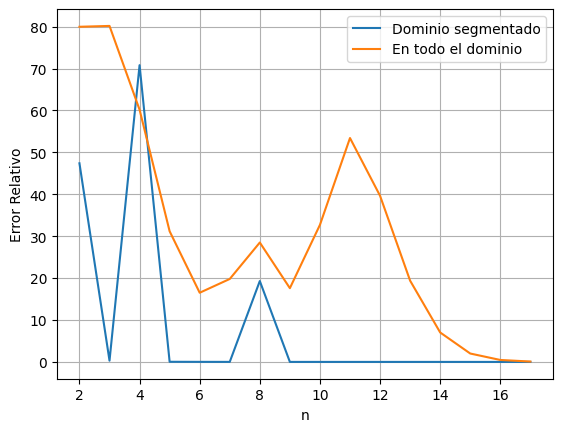

In [11]:
n = 17

n_Integrals_SegmentedDomain = []
n_Integrals_FullDomain = []
errorR_SegmentedDomain = []
errorR_FullDomain = []

ns = np.arange(2, n+1, 1)

for n in ns:
    integral = segmented_1D_numerical_integration(la, lb, n, f)
    n_Integrals_SegmentedDomain.append(integral)
    errorR_SegmentedDomain.append(round(100*abs(integral-analyticalIntegral)/analyticalIntegral,3))
    
    integral = numerical_integration_1D(la, lb, f, n)
    n_Integrals_FullDomain.append(integral)
    errorR_FullDomain.append(round(100*abs(integral-analyticalIntegral)/analyticalIntegral,3))

plt.figure()
plt.plot(ns, errorR_SegmentedDomain, label = "Dominio segmentado")
plt.plot(ns, errorR_FullDomain, label = "En todo el dominio")
plt.grid()
plt.xlabel("n")
plt.ylabel("Error Relativo")
plt.legend()

# 4. Mallas e Integración 2D
#### Integral:
$$\iint \limits_{\Omega} \left(sin(\pi x) \cdot cos^2(\pi y)\right) d\Omega$$
#### Dominio: 
$$\Omega = \left\lbrace 0, 5 \right\rbrace \times \left\lbrace 0, 2 \right\rbrace \ \cup \ \left\lbrace 2, 7 \right\rbrace \times \left\lbrace 2, 4 \right\rbrace$$

#### Solución analítica:
$$\int \limits_{0}^{2} \int \limits_{0}^{5} \left(sin(\pi x) \cdot cos^2(\pi y)\right) \, dx \, dy + \int \limits_{2}^{4} \int \limits_{2}^{7} \left(sin(\pi x) \cdot cos^2(\pi y)\right) \, dx \, dy$$

In [12]:
x, y = sym.symbols('x y')
f = sym.sin(sym.pi*x)*sym.cos(sym.pi*y)**2

xla1, xlb1 = (0, 5)
xla2, xlb2 = (2, 7)
yla1, ylb1 = (0, 2)
yla2, ylb2 = (2, 4)

analyticalIntegral = round(sym.integrate(f, (y, yla1, ylb1), (x, xla1, xlb1)) + sym.integrate(f, (y, yla2, ylb2), (x, xla2, xlb2)),7)
print('Integral analítica: ', analyticalIntegral)

Integral analítica:  1.2732395


Para la integración 2D con el Método de Cuadraturas Gaussianas se hace uso de la función ***gaussian_integration_2D*** creada por **© Daniel Giraldo Cuartas 2022**:

In [13]:
def gaussian_integration_2D(p0, p1, p2, p3, fun, nx, ny):
    '''
        - p0, p1, p2, p3:
            Coordenadas de los punto (x,y) del cuadrilatero
        
        - fun:
            Funcion lambda f(x,y) a interpolar
            
        - nx, ny:
            Numero de puntos de cuadratura a utilizar en direccion
            x, y respectivamente.
    '''
    xi, wi = np.polynomial.legendre.leggauss(nx)
    yj, wj = np.polynomial.legendre.leggauss(ny)
    
    X = np.matrix([p0, p1, p2, p3])
    
    
    Nt = lambda r,s : 0.25*np.array([
        (1-r)*(1-s),
        (1+r)*(1-s),
        (1+r)*(1+s),
        (1-r)*(1+s)
        ])
    
    Dt = lambda r,s : 0.25*np.array([
        [s-1, r-1],
        [1-s, -1-r],
        [1+s, 1+r],
        [-1-s, 1-r]
        ]).transpose()
    
    integral = 0
    for i in range(nx):
        rx = xi[i]
        wx = wi[i]
        for j in range(ny):
            sy = yj[j]
            wy = wj[j]
            
            J = Dt(rx, sy)*X
            det_J = np.linalg.det(J)
            
            x_vec = Nt(rx, sy)*X
            f_val = fun(x_vec[0,0], x_vec[0,1])
            integral += (f_val)*det_J*wx*wy
            
    return integral

El dominio de integracion $\Omega$ corresponde al mostrado en la siguiente figura. Para almacenar este dominio, se hace una malla con dos rectangulos apartir de los puntos dados.  

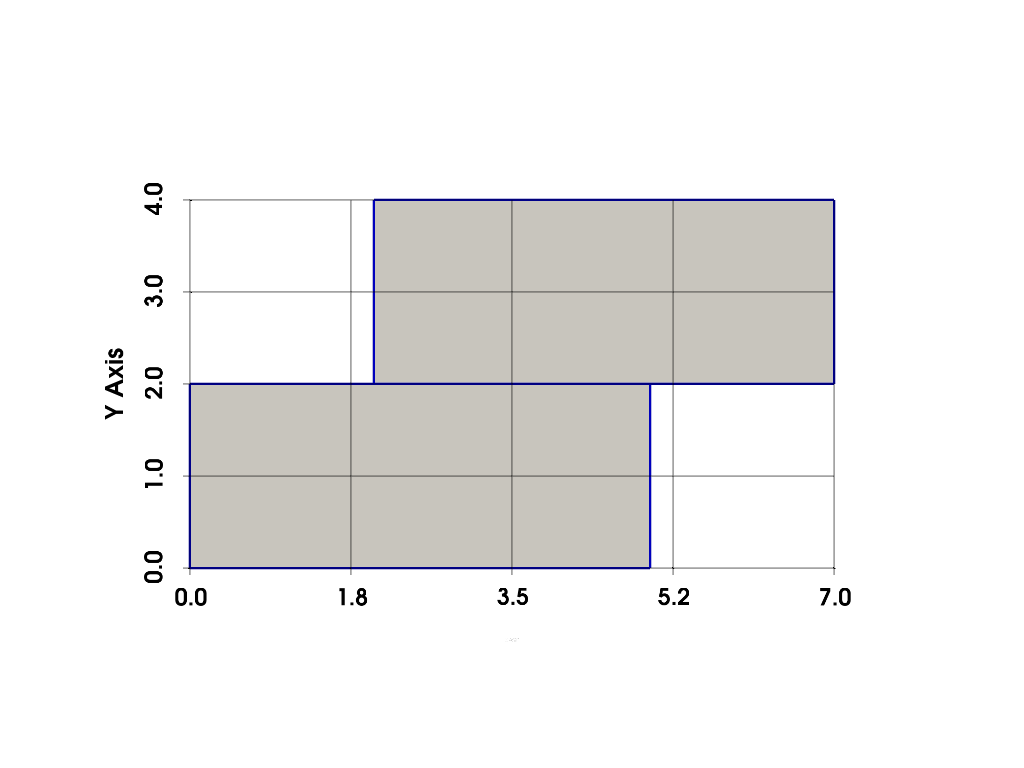

In [14]:
points = np.array([
    [0,0], 
    [5,0],
    [5,2],
    [0,2],
    ##
    [2,2],
    [7,2],
    [7,4],
    [2,4]
], dtype='float32')

rectangles = np.array([
    [0,1,2,3],
    [4,5,6,7],
], dtype='int32')

cells = [("quad", rectangles)]
original_mesh = meshio.Mesh(points, cells)

original_mesh_pv = pv.wrap(original_mesh)

pl = pv.Plotter()
pl.add_mesh(original_mesh_pv, color='white')
pl.add_mesh(original_mesh_pv, color="blue", style='wireframe', line_width=3)
pl.view_xy()
pl.show_grid()
pl.show(jupyter_backend='pythreejs')

A continuación se procede a subdividir en rectangulos la malla anterior en dos mallas estructuradas (a partir de los dos rectangulos que se tenían anteriormente) según la cantidad de rectangulos que se deseen en cada una de las dos direcciones. 

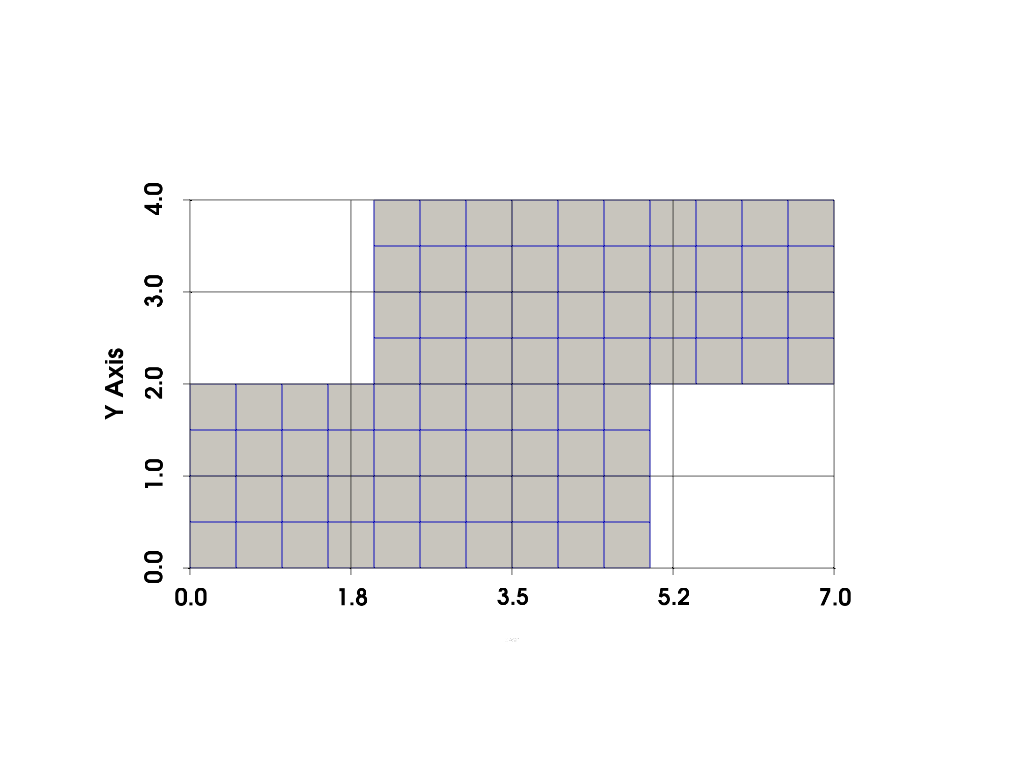

In [20]:
n = 10
z = 4
#z = int(n*2/5) # para una malla con cuadrados (z depende de n, donde n debe ser un multiplo de 5)

ps = []
rs = []

for m in range(len(rectangles)):
    xs = np.linspace(points[rectangles[m][0]][0], points[rectangles[m][1]][0], n+1)
    ys = np.linspace(points[rectangles[m][0]][1], points[rectangles[m][2]][1], z+1)
    for j in range(z+1):
        for i in range(n+1):
            ps.append([xs[i], ys[j]])
            
            if (j == z)|(i == n):
                pass
            else:
                n1 = (j*n + j + i) + m*(n+1)*(z+1)
                n2 = n1 + 1
                n3 = n2+n+1
                n4 = n3-1
                rs.append([n1, n2, n3, n4]) 

cells = [("quad", rs)]
mesh = meshio.Mesh(ps, cells)

mesh_pv = pv.wrap(mesh)

pl2 = pv.Plotter()
pl2.add_mesh(mesh_pv, color='white')
pl2.add_mesh(mesh_pv, color="blue", style='wireframe', line_width=1.5)
pl2.view_xy()
pl2.show_grid()
pl2.show(jupyter_backend='pythreejs')

Seguidamente se procede a realizar una integración con el método de cuadraturas gaussianas para cada rectangulo para posteriormente sumar cada resultado y hallar el valor de la integral requerida.

In [16]:
fun = lambda x, y: np.sin(np.pi*x)*np.cos(np.pi*y)**2

integral = 0

nx = 3
ny = 3

for i in range(len(rs)):
    p0 = ps[rs[i][0]]
    p1 = ps[rs[i][1]]
    p2 = ps[rs[i][2]]
    p3 = ps[rs[i][3]]

    integral_num = gaussian_integration_2D(p0, p1, p2, p3, fun, nx, ny)
    
    integral += integral_num
    
errorR = (round(100*abs(integral-analyticalIntegral)/analyticalIntegral,3))
print("Integral numérica: ", integral)
print(f"Error relativo: {errorR} %")

Integral numérica:  1.2732498854207883
Error relativo: 0.001 %
